Using Google colab for development of date prediction of invoices

In [1]:
import pandas as pd
import numpy as np
import os


Loading the dataset

In [2]:
import io
df2 = pd.read_csv('1805176.csv')

In [3]:
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR co,2019-12-03 00:00:00,2019.0,1.930185e+09,2019-11-22,20191122,20191122,20191207.0,USD,RV,1.0,NaN,23362.84,20191122.0,NAH4,1.930185e+09,0
1,U001,0200744019,TARG foundation,2020-01-29 00:00:00,2020.0,1.930392e+09,2020-01-14,20200113,20200114,20200129.0,USD,RV,1.0,NaN,3977.47,20200114.0,NAA8,1.930392e+09,0
2,U001,0200704045,RA associates,2019-07-05 00:00:00,2019.0,1.929518e+09,2019-06-20,20190620,20190620,20190705.0,USD,RV,1.0,NaN,26230.18,20190620.0,NAA8,1.929518e+09,0
3,U001,0200793568,SUPE associates,2019-05-20 00:00:00,2019.0,1.929252e+09,2019-05-03,20190503,20190503,20190518.0,USD,RV,1.0,NaN,81606.25,20190503.0,NAA8,1.929252e+09,0
4,U001,200761734,H E BUT corporation,2019-02-05 00:00:00,2019.0,1.928652e+09,2019-01-22,20190119,20190122,20190206.0,USD,RV,1.0,NaN,15293.58,20190122.0,NAA8,1.928652e+09,0


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45863 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

Dropped the area buisness column as its evidently all null values

In [5]:
df2=df2.drop(['area_business'],axis=1)


Converting all objects,int , float dates to datetime

In [6]:
df2['due_in_date']=pd.to_datetime(df2['due_in_date'],format='%Y%m%d')

In [7]:
df2['clear_date']=pd.to_datetime(df2['clear_date'])

In [8]:
df2['posting_date']=pd.to_datetime(df2['posting_date'])

In [9]:
df2['posting_date'].dtypes
df2.astype({'posting_date': 'str'}).dtypes
df2['posting_date']=pd.to_datetime(df2['posting_date'])

In [10]:
df2['document_create_date.1']=pd.to_datetime(df2['document_create_date.1'])
df2['document_create_date.1']

0       1970-01-01 00:00:00.020191122
1       1970-01-01 00:00:00.020200114
2       1970-01-01 00:00:00.020190620
3       1970-01-01 00:00:00.020190503
4       1970-01-01 00:00:00.020190122
                     ...             
49995   1970-01-01 00:00:00.020200313
49996   1970-01-01 00:00:00.020200322
49997   1970-01-01 00:00:00.020200324
49998   1970-01-01 00:00:00.020200318
49999   1970-01-01 00:00:00.020200328
Name: document_create_date.1, Length: 50000, dtype: datetime64[ns]

In [12]:
#Creating target variable named target by substracting due date and clear date column

In [13]:
df2['Target']=(df2['clear_date']-df2['due_in_date']).dt.days
df2.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,U001,0200769623,WAL-MAR co,2019-12-03,2019.0,1.930185e+09,2019-11-22,20191122,1970-01-01 00:00:00.020191122,2019-12-07,USD,RV,1.0,23362.84,20191122.0,NAH4,1.930185e+09,0,-4.0
1,U001,0200744019,TARG foundation,2020-01-29,2020.0,1.930392e+09,2020-01-14,20200113,1970-01-01 00:00:00.020200114,2020-01-29,USD,RV,1.0,3977.47,20200114.0,NAA8,1.930392e+09,0,0.0
2,U001,0200704045,RA associates,2019-07-05,2019.0,1.929518e+09,2019-06-20,20190620,1970-01-01 00:00:00.020190620,2019-07-05,USD,RV,1.0,26230.18,20190620.0,NAA8,1.929518e+09,0,0.0
3,U001,0200793568,SUPE associates,2019-05-20,2019.0,1.929252e+09,2019-05-03,20190503,1970-01-01 00:00:00.020190503,2019-05-18,USD,RV,1.0,81606.25,20190503.0,NAA8,1.929252e+09,0,2.0
4,U001,200761734,H E BUT corporation,2019-02-05,2019.0,1.928652e+09,2019-01-22,20190119,1970-01-01 00:00:00.020190122,2019-02-06,USD,RV,1.0,15293.58,20190122.0,NAA8,1.928652e+09,0,-1.0


In [14]:
df2['Target']

0       -4.0
1        0.0
2        0.0
3        2.0
4       -1.0
        ... 
49995    NaN
49996    NaN
49997    NaN
49998    NaN
49999    NaN
Name: Target, Length: 50000, dtype: float64

In [15]:

df2['posting_date']

0       2019-11-22
1       2020-01-14
2       2019-06-20
3       2019-05-03
4       2019-01-22
           ...    
49995   2020-03-13
49996   2020-03-22
49997   2020-03-24
49998   2020-03-18
49999   2020-03-28
Name: posting_date, Length: 50000, dtype: datetime64[ns]

In [16]:
#test-train split where test set is clear_date = null and subsequently making isOpen =1
#df is test set
df=df2[(df2['clear_date'].isnull()) & (df2['isOpen']==1)]
df1=df2[(df2['clear_date'].notnull()) & (df2['isOpen']==0)] 
df1['invoice_currency'].value_counts()                                                                          

USD    42258
CAD     3605
Name: invoice_currency, dtype: int64

Dropping redundandant columns or highly correlated columns as its of no subsequent use in model training and prediction

In [17]:
df1=df1.drop(['business_code', 'name_customer', 'doc_id','document_create_date','document type', 'posting_id','isOpen'],axis=1)

In [18]:
df2['cust_number'].value_counts()

0200769623    11284
0200726979     1860
0200762301     1455
0200759878     1386
0200794332     1176
              ...  
100013335         1
0200630112        1
0140106302        1
0100048218        1
0200112978        1
Name: cust_number, Length: 1438, dtype: int64

In [19]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
45863,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930803e+09,2020-04-19,20200420,1970-01-01 00:00:00.020200419,2020-05-04,USD,RV,1.0,57795.68,20200419.0,NAH4,1.930803e+09,1,NaN
45864,U001,0200769623,WAL-MAR,NaT,2020.0,1.930706e+09,2020-03-26,20200326,1970-01-01 00:00:00.020200326,2020-04-10,USD,RV,1.0,3485.14,20200326.0,NAH4,1.930706e+09,1,NaN
45865,U001,0100044041,DEF. F associates,NaT,2020.0,1.930858e+09,2020-05-05,20200505,1970-01-01 00:00:00.020200505,2020-05-24,USD,RV,1.0,1413.82,20200501.0,NAM4,1.930858e+09,1,NaN
45866,U001,0200705742,DOT trust,NaT,2020.0,1.930693e+09,2020-03-24,20200324,1970-01-01 00:00:00.020200324,2020-04-08,USD,RV,1.0,10998.50,20200324.0,NAA8,1.930693e+09,1,NaN
45867,U001,0200752302,KROGER us,NaT,2020.0,1.930704e+09,2020-03-27,20200325,1970-01-01 00:00:00.020200327,2020-04-11,USD,RV,1.0,19436.30,20200327.0,NAA8,1.930704e+09,1,NaN


Dropped clear date from test set as it is null which it should be so of no use


In [20]:
df=df.drop(['clear_date'],axis=1)

In [47]:
len(df1.axes[1]) 

13

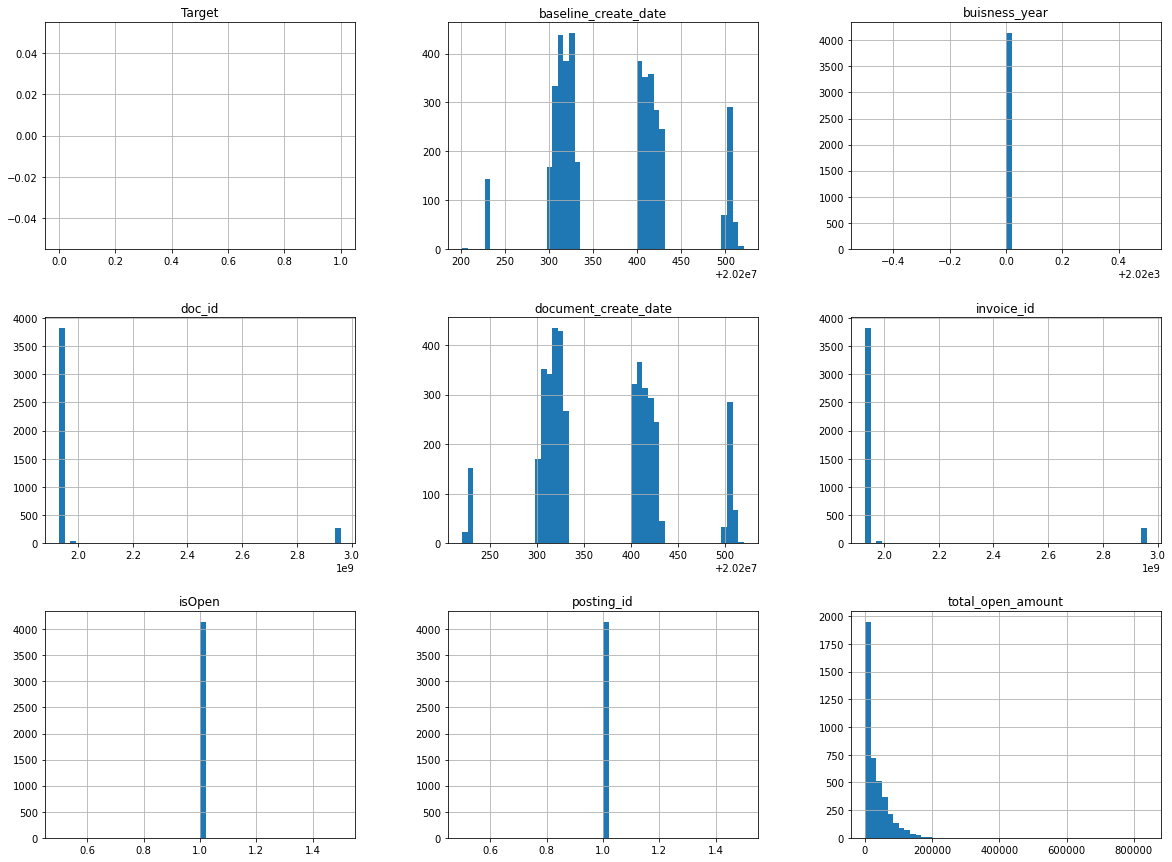

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

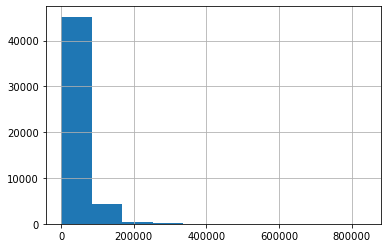

In [49]:
df2['total_open_amount'].hist()

In [50]:
min_val = df2['total_open_amount'].min()
max_val = df2['total_open_amount'].max()

In [51]:
df2.describe()

,buisness_year,doc_id,document_create_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen,Target
count,50000.000000,5.000000e+04,5.000000e+04,50000.0,50000.000000,5.000000e+04,4.999500e+04,50000.000000,45863.000000
mean,2019.203980,2.011290e+09,2.019250e+07,1.0,32073.374333,2.019253e+07,2.010541e+09,0.082740,0.885965
std,0.402958,2.854703e+08,3.910243e+03,0.0,39312.408586,3.893290e+03,2.754853e+08,0.275492,11.074688
min,2019.000000,1.928502e+09,2.018123e+07,1.0,0.630000,2.018102e+07,1.928502e+09,0.000000,-88.000000
25%,2019.000000,1.929231e+09,2.019042e+07,1.0,4731.915000,2.019042e+07,1.929231e+09,0.000000,-3.000000
50%,2019.000000,1.929806e+09,2.019081e+07,1.0,17187.430000,2.019081e+07,1.929805e+09,0.000000,0.000000
75%,2019.000000,1.930400e+09,2.019112e+07,1.0,46391.880000,2.019113e+07,1.930400e+09,0.000000,2.000000
max,2020.000000,9.500000e+09,2.020052e+07,1.0,838758.370000,2.020052e+07,2.960636e+09,1.000000,287.000000


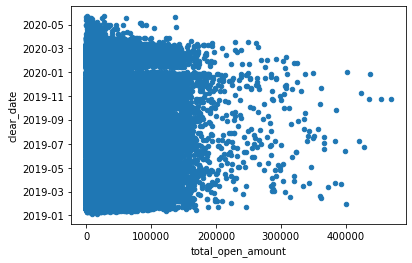

In [52]:
df2.plot(kind='scatter', x='total_open_amount', y='clear_date')

In [23]:
val1=val.iloc[:6880,:]
val2=val.iloc[6880:,:]

In [24]:
val2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 38983 to 45862
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   6880 non-null   int64         
 1   cust_number             6880 non-null   object        
 2   clear_date              6880 non-null   datetime64[ns]
 3   buisness_year           6880 non-null   float64       
 4   posting_date            6880 non-null   datetime64[ns]
 5   document_create_date.1  6880 non-null   datetime64[ns]
 6   due_in_date             6880 non-null   datetime64[ns]
 7   invoice_currency        6880 non-null   object        
 8   total_open_amount       6880 non-null   float64       
 9   baseline_create_date    6880 non-null   float64       
 10  cust_payment_terms      6880 non-null   object        
 11  invoice_id              6880 non-null   float64       
 12  Target                  6880 non-null   flo

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32102 entries, 0 to 32101
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   32102 non-null  int64         
 1   cust_number             32102 non-null  object        
 2   clear_date              32102 non-null  datetime64[ns]
 3   buisness_year           32102 non-null  float64       
 4   posting_date            32102 non-null  datetime64[ns]
 5   document_create_date.1  32102 non-null  datetime64[ns]
 6   due_in_date             32102 non-null  datetime64[ns]
 7   invoice_currency        32102 non-null  object        
 8   total_open_amount       32102 non-null  float64       
 9   baseline_create_date    32102 non-null  float64       
 10  cust_payment_terms      32102 non-null  object        
 11  invoice_id              32097 non-null  float64       
 12  Target                  32102 non-null  float6

 **Time for some feature engineering to extract valuable information from datetime columns**

In [26]:
#getting month , week , quarter , if weekday or not these kinds of infrmation to help train

SyntaxError: invalid syntax (<ipython-input-26-4b9305bed464>, line 1)

In [27]:
train['month_clear'] = train['clear_date'].dt.month

<ipython-input-27-52cfddf30db8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['month_clear'] = train['clear_date'].dt.month


In [28]:
train['month_clear']

0         5
1         1
2         3
3         1
4         1
         ..
32097    10
32098    10
32099    10
32100    11
32101    10
Name: month_clear, Length: 32102, dtype: int64

In [29]:
train['weekday_clear'] = train['clear_date'].dt.dayofweek
train['weekday_clear']

<ipython-input-29-609cfa3853d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekday_clear'] = train['clear_date'].dt.dayofweek


0        4
1        3
2        4
3        3
4        2
        ..
32097    1
32098    2
32099    2
32100    2
32101    2
Name: weekday_clear, Length: 32102, dtype: int64

In [30]:
train['day_clear']=train['clear_date'].dt.day
train['day_clear']

<ipython-input-30-72c974563269>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['day_clear']=train['clear_date'].dt.day


0        31
1        10
2         1
3        10
4         9
         ..
32097    22
32098    23
32099    23
32100    27
32101    23
Name: day_clear, Length: 32102, dtype: int64

In [31]:
train['quarter_clear']=train['clear_date'].dt.quarter

<ipython-input-31-9507bc70b6c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['quarter_clear']=train['clear_date'].dt.quarter


In [32]:
train['WEEKDAY_clear'] = pd.to_datetime(train['clear_date']).dt.dayofweek  # monday = 0, sunday = 6
train['weekend_clear'] = 0          # Initialize the column with default value of 0
train.loc[train['WEEKDAY_clear'].isin([5, 6]), 'weekend_clear'] = 1

<ipython-input-32-1d9dcf3ef787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['WEEKDAY_clear'] = pd.to_datetime(train['clear_date']).dt.dayofweek  # monday = 0, sunday = 6
<ipython-input-32-1d9dcf3ef787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['weekend_clear'] = 0          # Initialize the column with default value of 0
/home/adarsh/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [33]:
train['week_clear']=train['clear_date'].dt.weekofyear

<ipython-input-33-1ec977e3d237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['week_clear']=train['clear_date'].dt.weekofyear


In [34]:
train=train.drop(['WEEKDAY_clear'],axis=1)

Want to check if extracted some features which are highly correlated by plotting heatmap of correlations of all columns

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import VarianceThreshold

In [36]:
train

,index,cust_number,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Target,month_clear,weekday_clear,day_clear,quarter_clear,weekend_clear,week_clear
0,7928,0140104409,2019-05-31,2019.0,2019-03-29,1970-01-01 00:00:00.020181024,2018-11-03,CAD,878.40,20181024.0,CA10,NaN,209.0,5,4,31,2,0,22
1,27787,0200769623,2019-01-10,2019.0,2018-12-30,1970-01-01 00:00:00.020181230,2019-01-14,USD,53468.80,20181230.0,NAH4,1.928542e+09,-4.0,1,3,10,1,0,2
2,32364,CCU013,2019-03-01,2019.0,2018-12-30,1970-01-01 00:00:00.020181230,2018-12-30,USD,10689.05,20181230.0,NAX2,1.928517e+09,61.0,3,4,1,1,0,9
3,19337,0200769623,2019-01-10,2019.0,2018-12-30,1970-01-01 00:00:00.020181230,2019-01-14,USD,8260.09,20181230.0,NAH4,1.928545e+09,-4.0,1,3,10,1,0,2
4,33926,0200769623,2019-01-09,2019.0,2018-12-30,1970-01-01 00:00:00.020181230,2019-01-14,USD,21950.77,20181230.0,NAH4,1.928543e+09,-5.0,1,2,9,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32097,44560,0200761734,2019-10-22,2019.0,2019-10-08,1970-01-01 00:00:00.020191008,2019-10-23,USD,64505.90,20191008.0,NAA8,1.929984e+09,-1.0,10,1,22,4,0,43
32098,23713,0200704045,2019-10-23,2019.0,2019-10-08,1970-01-01 00:00:00.020191008,2019-10-23,USD,28727.09,20191008.0,NAA8,1.929990e+09,0.0,10,2,23,4,0,43
32099,16491,0200418007,2019-10-23,2019.0,2019-10-08,1970-01-01 00:00:00.020191008,2019-10-23,USD,51598.21,20191008.0,NAA8,1.929974e+09,0.0,10,2,23,4,0,43
32100,31537,CCU013,2019-11-27,2019.0,2019-10-08,1970-01-01 00:00:00.020191008,2019-10-08,USD,1545.26,20191008.0,NAX2,1.929964e+09,50.0,11,2,27,4,0,48


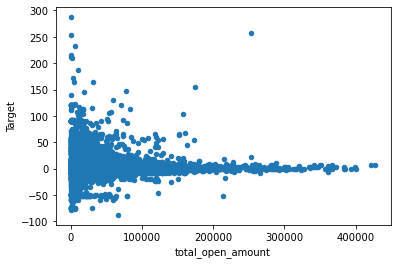

In [54]:
train.plot(kind='scatter', x='total_open_amount', y='Target')

We see that as the order amount increases the invoice is cleared nearly on the due date

In [56]:
train = train.drop(['index', 'cust_number','clear_date' ,'buisness_year' ,'posting_date', 'document_create_date.1' ,'due_in_date'], axis=1)
val1 = val1.drop(['index', 'cust_number','clear_date' ,'buisness_year' ,'posting_date', 'document_create_date.1' ,'due_in_date'], axis=1)
val2 = val2.drop(['index', 'cust_number','clear_date' ,'buisness_year' ,'posting_date', 'document_create_date.1' ,'due_in_date'], axis=1)

In [57]:
train

,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Target,month_clear,weekday_clear,day_clear,quarter_clear,weekend_clear,week_clear
0,CAD,878.40,20181024.0,CA10,NaN,209.0,5,4,31,2,0,22
1,USD,53468.80,20181230.0,NAH4,1.928542e+09,-4.0,1,3,10,1,0,2
2,USD,10689.05,20181230.0,NAX2,1.928517e+09,61.0,3,4,1,1,0,9
3,USD,8260.09,20181230.0,NAH4,1.928545e+09,-4.0,1,3,10,1,0,2
4,USD,21950.77,20181230.0,NAH4,1.928543e+09,-5.0,1,2,9,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32097,USD,64505.90,20191008.0,NAA8,1.929984e+09,-1.0,10,1,22,4,0,43
32098,USD,28727.09,20191008.0,NAA8,1.929990e+09,0.0,10,2,23,4,0,43
32099,USD,51598.21,20191008.0,NAA8,1.929974e+09,0.0,10,2,23,4,0,43
32100,USD,1545.26,20191008.0,NAX2,1.929964e+09,50.0,11,2,27,4,0,48


In [58]:
train = train.drop(['baseline_create_date', 'cust_payment_terms', 'invoice_id'], axis=1)
val1 = val1.drop(['baseline_create_date', 'cust_payment_terms', 'invoice_id'], axis=1)
val2 = val2.drop(['baseline_create_date', 'cust_payment_terms', 'invoice_id'], axis=1)

In [59]:
train

,invoice_currency,total_open_amount,Target,month_clear,weekday_clear,day_clear,quarter_clear,weekend_clear,week_clear
0,CAD,878.40,209.0,5,4,31,2,0,22
1,USD,53468.80,-4.0,1,3,10,1,0,2
2,USD,10689.05,61.0,3,4,1,1,0,9
3,USD,8260.09,-4.0,1,3,10,1,0,2
4,USD,21950.77,-5.0,1,2,9,1,0,2
...,...,...,...,...,...,...,...,...,...
32097,USD,64505.90,-1.0,10,1,22,4,0,43
32098,USD,28727.09,0.0,10,2,23,4,0,43
32099,USD,51598.21,0.0,10,2,23,4,0,43
32100,USD,1545.26,50.0,11,2,27,4,0,48


In [60]:
train.corr()

,total_open_amount,Target,month_clear,weekday_clear,day_clear,quarter_clear,weekend_clear,week_clear
total_open_amount,1.000000,-0.000947,-0.004272,0.012099,0.002994,-0.001078,-0.017681,-0.004511
Target,-0.000947,1.000000,0.100949,0.079486,0.047547,0.086938,0.005827,0.104862
month_clear,-0.004272,0.100949,1.000000,0.013238,-0.107897,0.956127,0.001528,0.992796
weekday_clear,0.012099,0.079486,0.013238,1.000000,0.024143,-0.001957,0.119442,-0.001809
day_clear,0.002994,0.047547,-0.107897,0.024143,1.000000,-0.104394,0.027692,-0.000572
quarter_clear,-0.001078,0.086938,0.956127,-0.001957,-0.104394,1.000000,-0.001956,0.949613
weekend_clear,-0.017681,0.005827,0.001528,0.119442,0.027692,-0.001956,1.000000,0.002367
week_clear,-0.004511,0.104862,0.992796,-0.001809,-0.000572,0.949613,0.002367,1.000000
